## Project: Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important for me to get some practical work  to know more about how to implement A/B test in the real business.

In this project, I will be working to understand the results of an A/B test run by an e-commerce website.The company has developed a new web page in order to try and increase the number of users who “convert,” meaning the number of users who decide to pay for the company’s product. My goal is to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision . 



<a id='probability'></a>
#### Part I - Probability



In [1]:
# Import useful libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#I am setting the seed to assure to get the same answers on quizzes as I set up
random.seed(42)

In [2]:
# load dataset and store it in df 
df=pd.read_csv('ab_data.csv')
#Read top 5 data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Calculate the number of unique user in each group
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [4]:
# Get the number of rows in dataset
df.shape[0]

294478

In [5]:
# Get number of unique users in the dataset
df.user_id.nunique()

290584

**There are 5 columns in the dataset, and 294,478 rows in this dataset. The number of unique users in the dataset is 290,584. It means there are 3894 duplicate users’ records**.


In [6]:
# Calculating the proportion of users converted
converted_users=round(df.converted.mean()*100,2)
converted_users

11.970000000000001

**In the 294,478 records, the proportion of users converted is 11.97%.**

In [7]:
# Calculating the number of times the 'new_page' and 'treatment' do not match
no_match=df[(df['group']=='treatment')!=(df['landing_page']=='new_page')]
no_match.shape[0]

3893

**There are 3893 rows where the 'new_page' and 'treatment' do not match.**

In [8]:
# Get the the missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There is no row that has null values, which is a great thing. But I will delete the rows where the landing_page and group columns don’t match and then save the result to a new dataset df2.
.**

In [9]:
# Dropping the rows where treatment does not match with new_page or
#  control does not match with old_page and store new dataframe in df2

df2=df.drop(df[(df['group']=='treatment')!=(df['landing_page']=='new_page')].index)
# Checking the number of rows in df2
df2.shape[0]

290585

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
# Get the number of unique user_ids in df2
df2.user_id.nunique()

290584

**There is 290585 rows in new dataframe df2 and 290584 unique user id.
Therefore there is one duplicate user id**.

In [12]:
# Get duplicates data in df2
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
# Remove one of the duplicate user_id 
df2.drop_duplicates(subset=['user_id'],inplace=True)
# Confirme the change
df2.shape[0]

290584

In [14]:
#The probability of an individual converting regardless of the page they receive
converted_users=df2.converted.mean()
converted_users

0.11959708724499628

**The proportion of the individual converted regardless of the page they receivd is 11.96%.**

In [15]:
# filter individual from control group
control_df2=df2.query('group=="control"')


In [16]:
# calculate proportion of converting of individual from control group
control_converted=control_df2['converted'].mean()
control_converted

0.1203863045004612

**The proportion of converting of induvidual from control group is 12.04%.**

In [17]:
# filter individual from treatment group
treatment_df2=df2.query('group=="treatment"')

In [18]:
# calculate proportion of converting of individual from treatment group
treatment_converted=treatment_df2['converted'].mean()
treatment_converted

0.11880806551510564

**The proportion of converting of induvidual from treatment group is 11.88%**.

In [44]:
act_diff1=(treatment_converted-control_converted)
act_diff1

-0.0015782389853555567

**The observed difference between  the proportion of conversion of control group and treatment group is 0.1578 %**.

In [20]:
#the probability that an individual received the new page
new_page_per=df2[df2['landing_page']=="new_page"].shape[0]/df2['landing_page'].shape[0]
new_page_per

0.5000619442226688

In [21]:
new_page_per=round(new_page_per*100,2)
new_page_per

50.01

**The proportion of individuals receiving the new page is 50.01%. It shows that the users received the new or the old page in a ratio very close to 50:50, which is a good thing.**

**The proportion of control group converted is 12.04% and the proportion of treatment group converted is 11.88%.We can see that the proportion of control group converted  is larger than the proportion of treatment group by small difference of 0.16%.This small difference could appear by chance,therefore we do not have sufficient evidence to conclude that the new treatment page leads more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

**Method One- simulate by ourselves**

We assume that old page is better unless new page proves to be better at a type 1 error rate of 5% .My null hypothesis and alternative hypothesis will be as follows-

H0 : p_new-p_old <=0

H1 :p_new-p_old >0



In [22]:
#  calculate the conversion rate for  𝑝_𝑛𝑒𝑤  under the null
p_new=df2.converted.mean()
p_new

0.11959708724499628

In [23]:
#calculate the conversion rate for  𝑝_𝑜𝑙𝑑  under the null
p_old=df2.converted.mean()
p_old

0.11959708724499628

In [24]:
# Number of unique user id in treatment group
n_new=treatment_df2.user_id.nunique()
n_new

145310

In [45]:
# Number of unique user id in control group
n_old=control_df2.user_id.nunique()
n_old

145274

**The conversion rate of both p_new and p_old are 11.96%.There are 145,310 users are in the treatment group and 145,274 are in the control group.**

In [26]:
#Simulate 𝑛_𝑛𝑒𝑤 transactions with a conversion rate of 𝑝_𝑛𝑒𝑤 under the null and Store these 𝑛_𝑛𝑒𝑤 1’s and 0’s in new_page_converted

new_page_converted=np.random.choice([1,0],size=n_new,replace=True,p=(p_new,1-p_new))

In [27]:
#Simulate  𝑛𝑜𝑙𝑑  transactions with a conversion rate of  𝑝𝑜𝑙𝑑  under the null and Store these  𝑛𝑜𝑙𝑑  1's and 0's in old_page_converted.

old_page_converted=np.random.choice([1,0],size=n_old,replace=True,p=(p_old,1-p_old))


In [28]:
# calculate difference between simulated values of p_new and p_old
diff=new_page_converted.mean()-old_page_converted.mean()
diff

-0.00044948098792046975

**Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process  used  above and  store all 10,000 values in a NumPy array called p_diffs.**

In [29]:

p_diffs=[]
for x in range(10000):
    new_page_converted=np.random.choice([1,0],size=n_new,replace=True,p=(p_new,1-p_new))
    old_page_converted=np.random.choice([1,0],size=n_old,replace=True,p=(p_old,1-p_old))
    p_diff=new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)
    

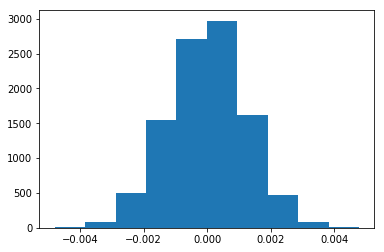

In [30]:
#Plot a histogram of the **p_diffs**
plt.hist(p_diffs);


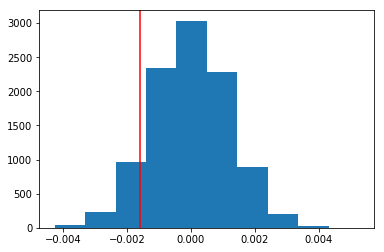

In [31]:
#simulate the distribution under the null hypothesi and show proportion of the p_diffs are greater than the act diff observed in ab_data.csv
p_diffs=np.array(p_diffs)
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.size)
plt.hist(null_vals)
plt.axvline(act_diff1,color='red');

In [32]:
#calculate the proportion  the null distribution that are bigger than the observed values
(null_vals>act_diff1).mean()


0.90429999999999999

**I used sampling distribution to simulate the distribution under the null hypothesis by creating a random normal distribution centered at 0 with the same spread and sample size.Then I calculate the proportion of the values in the null distribution that are bigger than the observed values.This value is called p-value which is 0.9042.It shows that 90.42 % conversion rate difference is larger than atual conversion rate difference.With the type 1 error rate of 0.05 ,0.9042 is much bigger than 0.05,therefore there is no enough evidence to reject null hypothesis.**

**Method Two-built in simulation**

**We could also use a built-in to achieve similar results.** 

In [33]:
import statsmodels.api as sm
from scipy.stats import norm


convert_old =control_df2[control_df2['converted']==1].user_id.nunique() 
convert_new = treatment_df2[treatment_df2['converted']==1].user_id.nunique()
n_old = df2[df2['landing_page']=="old_page"].user_id.nunique()
n_new = df2[df2['landing_page']=="new_page"].user_id.nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**Now I use stats.proportions_ztest` to compute  test statistic and p-value.**

In [34]:
z_score,p_value=sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')

#calculate the critical z_term

z_critical=norm.ppf(1-(0.05))
print("z score:", z_score  ,"\ncritical z score:", z_critical,"\np value:" ,p_value)


z score: 1.31092419842 
critical z score: 1.64485362695 
p value: 0.905058312759


**The p-value is 0.9050 which is much larger than 0.05 also z_score is smaller than critical z score so,we can not reject the null hypothesis.**

**There is no evidence to reject the null hypothesis.  The conclusion is that the conversion rate of new page is not larger than that of old page.**

<a id='regression'></a>
### Part III - A regression approach

 In this final part, I will see that the result I achieved in the A/B test in Part II above can also be achieved by performing regression. 
Since each row is either a conversion or no conversion, i will use logistic regression in this case


 The goal is to use **statsmodels** to fit the regression model to see if there is a significant difference in conversion based on which page a customer receives. I first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#add intercept
df2['intercept']=1
# Get dummies 
group_dummy=pd.get_dummies(df2['group'])
# join dummy variable in df2
df2=df2.join(group_dummy)
# Rename dummy variable
df2.rename(columns={'treatment':'ab_page'},inplace=True)
# Confirm the change
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


**Instantiate your regression model on the two columns I created to predict whether or not an individual converts.**


In [36]:
lm=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-29 21:59 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**The p-value associated with ab_page is 0.1899 which is bigger than the p-value I found in A/B testing.**

**The result is not that good ,so I will use other things that might influence
wheather or not an individual converts.Now along with testing if the conversion rate changes for different pages,also add an effect based on which country a user lives.**

In [37]:
df_country=pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# get dummy 
df_country=pd.get_dummies(df_country)

In [39]:
# merge df_country in the dataset
df2=df2.merge(df_country)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country_CA,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1


In [40]:
lm1=sm.Logit(df2['converted'],df2[['intercept','ab_page','country_CA','country_UK']])
result1=lm1.fit()
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-29 21:59 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
country_CA   -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
country_UK    0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

 Though I have now looked at the individual factors of country and page on conversion, I would now like to look at an interaction between page and country to see if there significant effects on conversion. I Create the necessary additional columns, and fit the new model.  

In [41]:
df2['CA_page']=df2['country_CA']*df2['ab_page']
df2['UK_page']=df2['country_UK']*df2['ab_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country_CA,country_UK,country_US,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1,0,0


In [42]:
lm2=sm.Logit(df2['converted'],df2[['intercept','ab_page','country_CA','country_UK','CA_page','UK_page']])
result2=lm2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-29 21:59 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
country_CA   -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
country_UK   -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

**The result shows that the p value is all larger than 0.05.The new variables that show the interaction between page and country even decrease the significance of the original 'CA'and 'UK'.Therefore this interation variable should not added to this model.**

# Conclusion


**A/B testing does not get a winning result. The conversion rate of the new page is not significantly bigger than that of the old page. But we can do something to make the test better with a much greater chance of succeeding.
1.Maybe we can collect at least 7 days of data. If we wait at least one week to reduce the impact of differences in traffic by day. Then we may get a different result.
2.We can also check the modification we make can be noticed by the users. 3.Segment our A/B test results just for the loyal user’s group will also have different A/B test results.**


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0